In [ ]:
from google.colab import files
uploaded = files.upload()

Saving steam.csv to steam.csv


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import io
steam = pd.read_csv(io.BytesIO(uploaded['steam.csv']))

#Checking dataset information

In [ ]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [ ]:
# Is there any null value in dataset
steam.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [ ]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [ ]:
steam.shape

(27075, 18)

In [ ]:
steam.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [ ]:
# collumn appid will not be usefull, so I am going to drop this column
steam.drop(columns='appid', inplace=True)

In [ ]:
# changing column 'release_date' type from object to datetime
steam['release_date'] = pd.to_datetime(steam['release_date'])

In [ ]:
# Let's check if changes are included
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              27075 non-null  object        
 1   release_date      27075 non-null  datetime64[ns]
 2   english           27075 non-null  int64         
 3   developer         27075 non-null  object        
 4   publisher         27075 non-null  object        
 5   platforms         27075 non-null  object        
 6   required_age      27075 non-null  int64         
 7   categories        27075 non-null  object        
 8   genres            27075 non-null  object        
 9   steamspy_tags     27075 non-null  object        
 10  achievements      27075 non-null  int64         
 11  positive_ratings  27075 non-null  int64         
 12  negative_ratings  27075 non-null  int64         
 13  average_playtime  27075 non-null  int64         
 14  median_playtime   2707

# Visualization

**Release_year**

In [ ]:
# plot amount of games release in each year
release_year = steam['release_date'].dt.year.value_counts().sort_index()
release_year
# There is significant disproportion between beggining years and late period
# I will plot it in two different plots

1997       1
1998       1
1999       2
2000       2
2001       4
2002       1
2003       3
2004       6
2005       6
2006      48
2007      93
2008     145
2009     305
2010     238
2011     239
2012     320
2013     418
2014    1555
2015    2597
2016    4361
2017    6357
2018    8160
2019    2213
Name: release_date, dtype: int64

Text(0.5, 1.0, 'Total games released in 1997-2005 years')

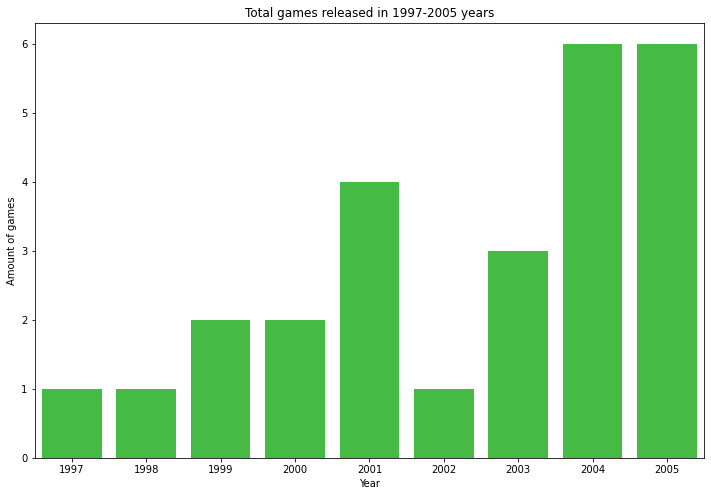

In [ ]:
# Plot of total games released in 1997-2005
plt.figure(figsize=(12, 8))
sns.barplot(x=release_year.index[:9],y=release_year.values[:9], color='limegreen')
plt.xlabel('Year')
plt.ylabel('Amount of games')
plt.title('Total games released in 1997-2005 years')

Text(0.5, 1.0, 'Total games released in 2006-2019 years')

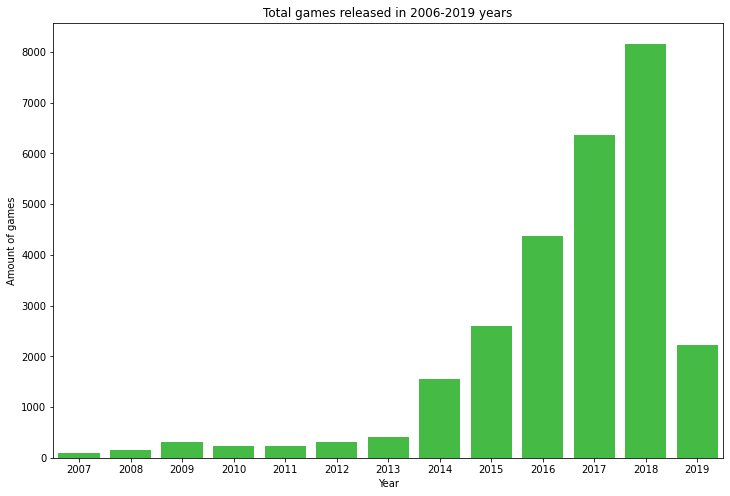

In [ ]:
# Plot of total games released in 2006-2019
plt.figure(figsize=(12, 8))
sns.barplot(x=release_year.index[10:], y=release_year.values[10:], color='limegreen')
plt.xlabel('Year')
plt.ylabel('Amount of games')
plt.title('Total games released in 2006-2019 years')
# In mid of 2012 Steam Greenlight was introduced, and amount of releases games started growing. 

**Release_months**

In [ ]:
# Let's check amount of all released games by months
release_month = steam['release_date'].dt.month.value_counts().sort_index()
release_month

1     1974
2     2325
3     2583
4     2437
5     2060
6     1767
7     2186
8     2333
9     2370
10    2491
11    2328
12    2221
Name: release_date, dtype: int64

Text(0.5, 1.0, 'Total games released by month')

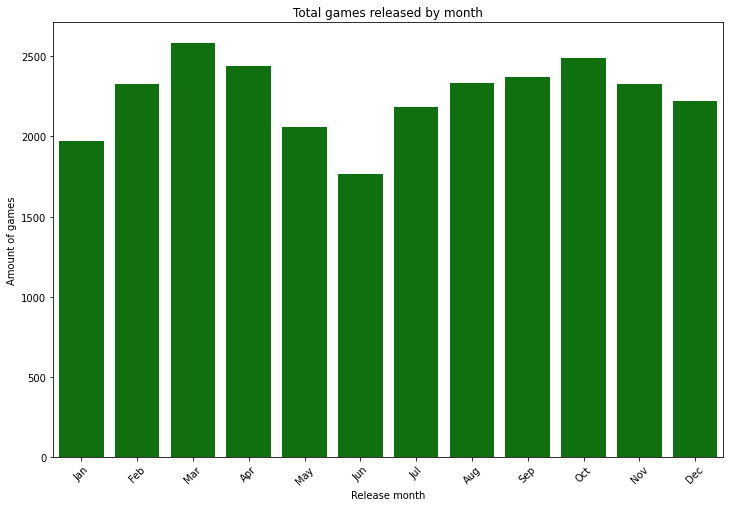

In [ ]:
# Values for description X axes
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot amount of all released games grouped by months
plt.figure(figsize=(12, 8))
m = sns.barplot(x=release_month.index, y=release_month.values, color='g')
m.set_xticklabels(months)
plt.xticks(rotation=45)
plt.xlabel('Release month')
plt.ylabel('Amount of games')
plt.title('Total games released by month')
# There is a significant drop on May and June. The reason can be that developers are waiting when holiday at school is started.(Just my thoughts)

**English data**

In [ ]:
# The "english" column has two values.
# 1 - english 
# 0 - non english 
steam['english'].value_counts()

1    26564
0      511
Name: english, dtype: int64

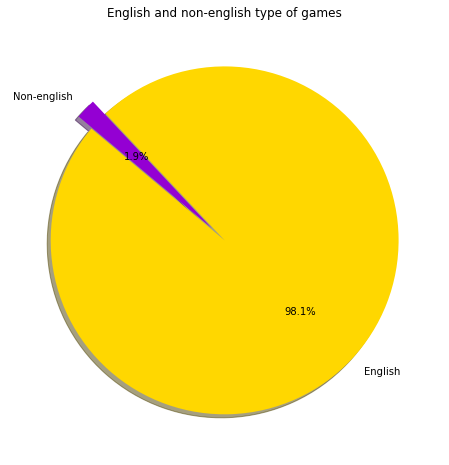

In [ ]:
labels = 'English', 'Non-english'
sizes = steam['english'].value_counts().values
explode = (0, 0.1)
plt.figure(figsize=(12, 8))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, colors=['gold', 'darkviolet'])
plt.title('English and non-english type of games')
plt.show()

In [ ]:
# In progress...